##### EDA (Exploratory Data Analysis) of P550 Drug Prediction and Disease Classification Project


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline


##### Importing essential Python libraries

In [ ]:
!file '/content/drugsCom_raw (2) (1).xlsx'

/content/drugsCom_raw (2) (1).xlsx: cannot open `/content/drugsCom_raw (2) (1).xlsx' (No such file or directory)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving drugsCom_raw (2) (1).xlsx to drugsCom_raw (2) (1).xlsx


In [ ]:
data = pd.read_excel('/content/drugsCom_raw (2) (1).xlsx')

In [ ]:
data

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,2015-05-31,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,2011-11-01,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,2014-03-15,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,2015-09-19,79


##### Load the Dataset and display our dataset.

In [ ]:
data.head(10)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,2017-03-07,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,2015-03-14,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,2016-08-09,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,2016-12-08,1


In [ ]:
data.tail(10)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
161287,132177,Ativan,Anxiety,"""I was super against taking medication. I&#039...",9,2016-08-16,61
161288,45410,Fluoxetine,Obsessive Compulsive Disorde,"""I have been off Prozac for about 4 weeks now....",8,2015-01-21,22
161289,105263,Carbamazepine,Trigeminal Neuralgia,"""Up to 800mg seems to work about once every 2n...",1,2016-01-31,10
161290,103458,Tekturna,High Blood Pressure,"""I have only been on Tekturna for 9 days. The ...",7,2010-02-07,18
161291,164345,Junel 1.5 / 30,Birth Control,"""This would be my second month on Junel. I&#03...",6,2015-05-27,0
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,2015-05-31,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,2011-11-01,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,2014-03-15,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,2015-09-19,79
161296,215220,Lubiprostone,"Constipation, Chronic","""I&#039;ve had chronic constipation all my adu...",9,2014-12-13,116


In [ ]:
data.shape

(161297, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   161297 non-null  int64         
 1   drugName     161297 non-null  object        
 2   condition    160398 non-null  object        
 3   review       161297 non-null  object        
 4   rating       161297 non-null  int64         
 5   date         161297 non-null  datetime64[ns]
 6   usefulCount  161297 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 8.6+ MB


##### Displays summary information about the dataset like column names, data types, and non-null counts.

In [ ]:
data.describe()

,Unnamed: 0,rating,date,usefulCount
count,161297.000000,161297.000000,161297,161297.000000
mean,115923.585305,6.994377,2014-06-11 08:51:43.779983360,28.004755
min,2.000000,1.000000,2008-02-24 00:00:00,0.000000
25%,58063.000000,5.000000,2012-04-12 00:00:00,6.000000
50%,115744.000000,8.000000,2015-06-09 00:00:00,16.000000
75%,173776.000000,10.000000,2016-08-19 00:00:00,36.000000
max,232291.000000,10.000000,2017-12-12 00:00:00,1291.000000
std,67004.445170,3.272329,NaN,36.403742


##### Provides basic statistical summary (mean, count, std, min, max, etc.) of all numerical columns.

In [ ]:
data.duplicated().sum()

np.int64(0)

##### This line checks for duplicate rows in the dataset and returns the total count of such duplicates.

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
drugName,0
condition,899
review,0
rating,0
date,0
usefulCount,0


##### Shows how many missing (null/NaN) values are there in each column.

In [ ]:
(data['condition'].isnull().sum()/data.shape[0]) * 100

np.float64(0.5573569254232875)

##### This line calculates the percentage of missing (null) values in the 'condition' column of the DataFrame data.

In [ ]:
data = data.dropna(subset=['condition'])
data = data.reset_index(drop=True)

##### Drops the rows where the condition column has missing values and resets the index.

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
drugName,0
condition,0
review,0
rating,0
date,0
usefulCount,0


##### Again checks for missing values after cleaning the condition column.

In [ ]:
print("Columns:", data.columns)

Columns: Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')


##### print columns name in dataset

In [ ]:
data.drop(columns=['Unnamed: 0', 'date'], axis=1, inplace=True, errors='ignore')
data

,drugName,condition,review,rating,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37
...,...,...,...,...,...
160393,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,125
160394,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,34
160395,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,35
160396,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,79


##### This line removes the columns 'Unnamed: 0' and 'date' from the DataFrame data. Using errors='ignore' ensures that no error is thrown if any of the columns do not exist.

##### The second line simply displays the updated DataFrame.

In [ ]:
print("Unique Conditions:", data['condition'].nunique())
print(data['condition'].value_counts())

Unique Conditions: 884
condition
Birth Control                                   28788
Depression                                       9069
Pain                                             6145
Anxiety                                          5904
Acne                                             5588
                                                ...  
26</span> users found this comment helpful.         1
Patent Ductus Arteriosus                            1
Scleroderma                                         1
145</span> users found this comment helpful.        1
ungal Pneumonia                                     1
Name: count, Length: 884, dtype: int64


##### Counts how many unique medical conditions are in the dataset. and Shows how many times each condition appears in the dataset

In [ ]:
target_conditions = ['Depression', 'High Blood Pressure', 'Diabetes, Type 2']
data1 = data[data['condition'].isin(target_conditions)]

##### This line defines a list of selected medical conditions that we are interested in analyzing.This filters the original dataset and keeps only those rows where the condition is in our target list.

In [ ]:
data1

,drugName,condition,review,rating,usefulCount
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,54
30,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,3
43,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,3
49,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,24
66,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,166
...,...,...,...,...,...
160352,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4,39
160359,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1,25
160379,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9,47
160387,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,33


##### show dataset

In [ ]:
print("Filtered dataset size:", data1.shape)
print(data1['condition'].value_counts())

Filtered dataset size: (13944, 5)
condition
Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: count, dtype: int64


##### Prints the shape (rows, columns) of the filtered dataset in variable  data1. and Shows how many entries are there for each condition in data1.

### visualization

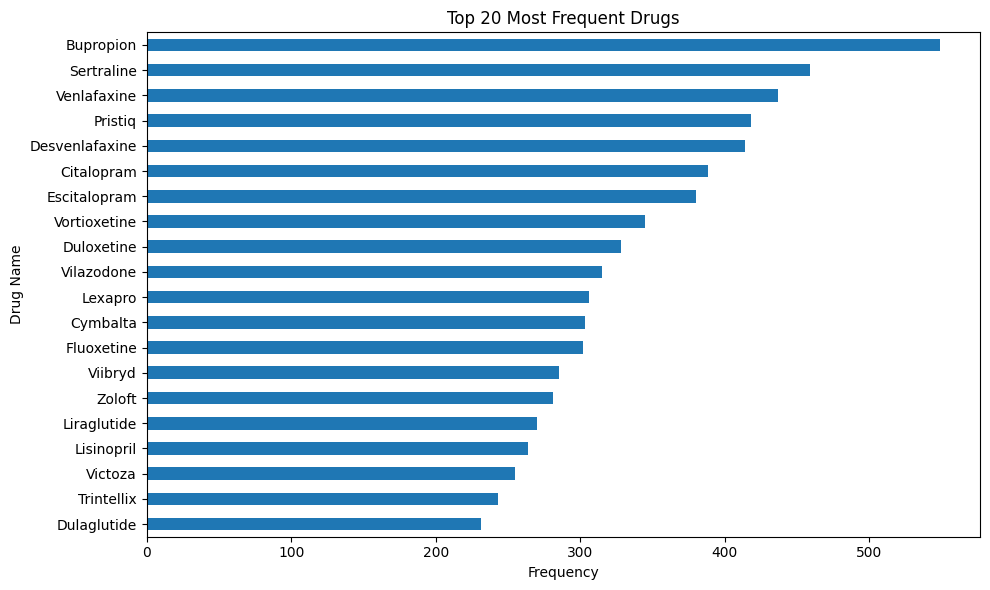

In [ ]:
top_drugs = data1['drugName'].value_counts().head(20) # Getting 20 drug names with highest frequency
top_drugs.plot(kind='barh') # horizontal bar chart
plt.title("Top 20 Most Frequent Drugs")
plt.xlabel("Frequency")
plt.ylabel("Drug Name")
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout() # fix the overlapping text
plt.show()

##### 'Bupropion' has highest frequency
##### This code identifies the top 20 most frequently mentioned drugs in the dataset and visualizes them using a horizontal bar chart, with the most frequent drug displayed at the top. It also adjusts the layout to prevent overlapping text.

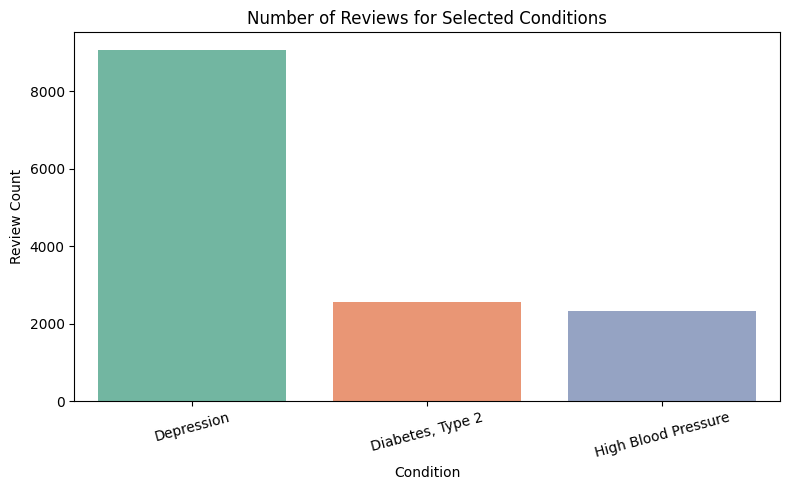

In [ ]:

condition_counts = data[data['condition'].isin(target_conditions)]['condition'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='Set2')
plt.title("Number of Reviews for Selected Conditions")
plt.xlabel("Condition")
plt.ylabel("Review Count")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

 ##### 'Depression' is most common condition
#####  Filters dataset to only include conditions present in 'target_conditions', then counts how many reviews are there per condition.Plots a bar graph to show the number of reviews for selected conditions.


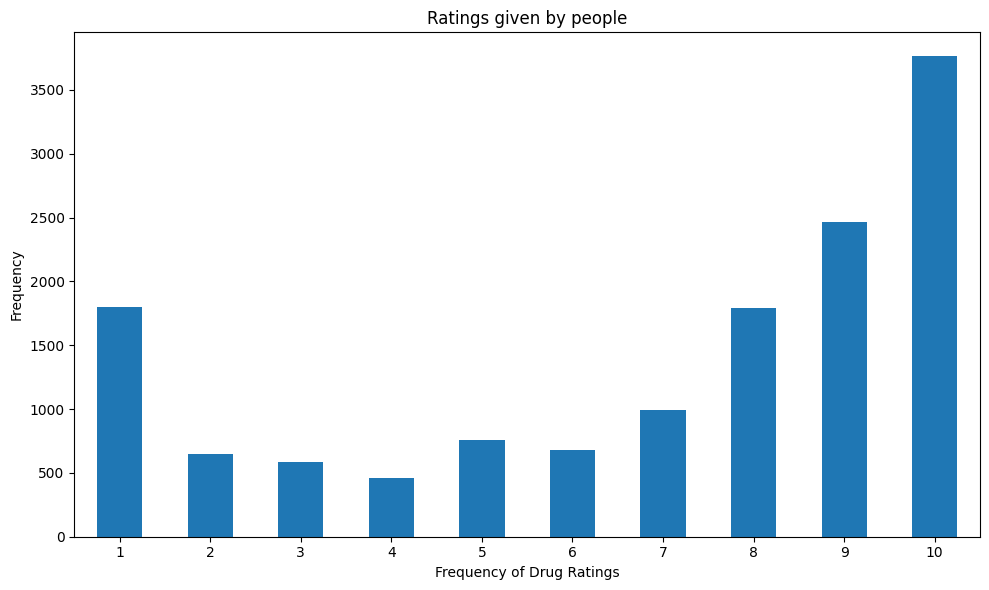

In [ ]:
data1['rating'].value_counts().sort_index().plot(kind = 'bar')
plt.title("Ratings given by people")
plt.xlabel("Frequency of Drug Ratings")
plt.ylabel("Frequency")
plt.xticks(rotation = 0)
plt.tight_layout() # Fix overalapping text
plt.show()

##### '10' rating is most common rating given by people.
##### This code creates a bar chart showing how frequently each rating (from 1 to 10) appears in the dataset. It helps visualize user sentiment trends, revealing whether reviews are mostly positive or negative.

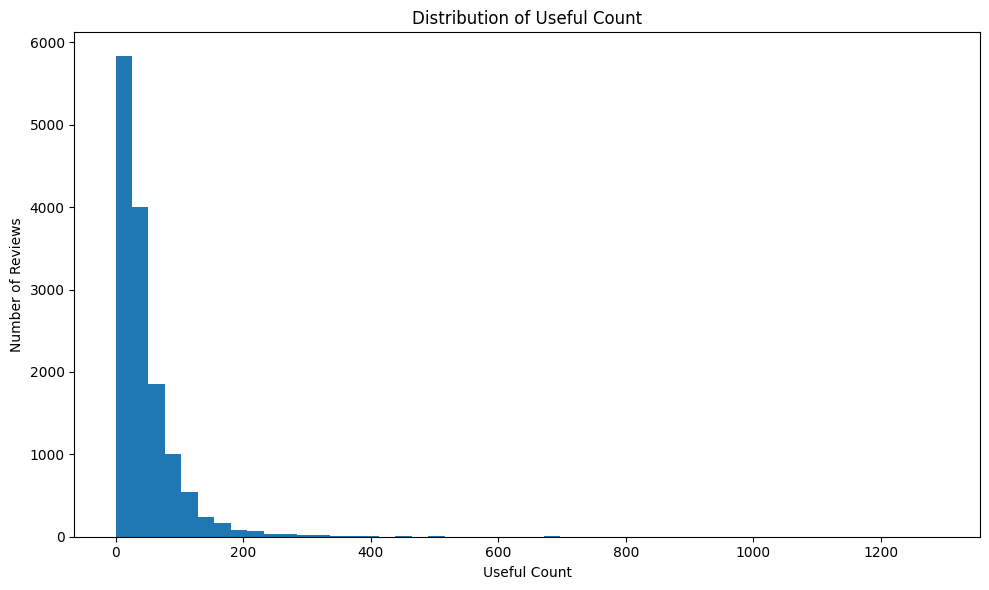

In [ ]:
plt.hist(data1['usefulCount'], bins=50)
plt.title('Distribution of Useful Count')
plt.xlabel('Useful Count')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

##### Reviews related to depression are widely read and found helpful.
##### This histogram shows the distribution of how many users found each review useful. It helps identify whether most reviews receive low or high engagement (useful votes).

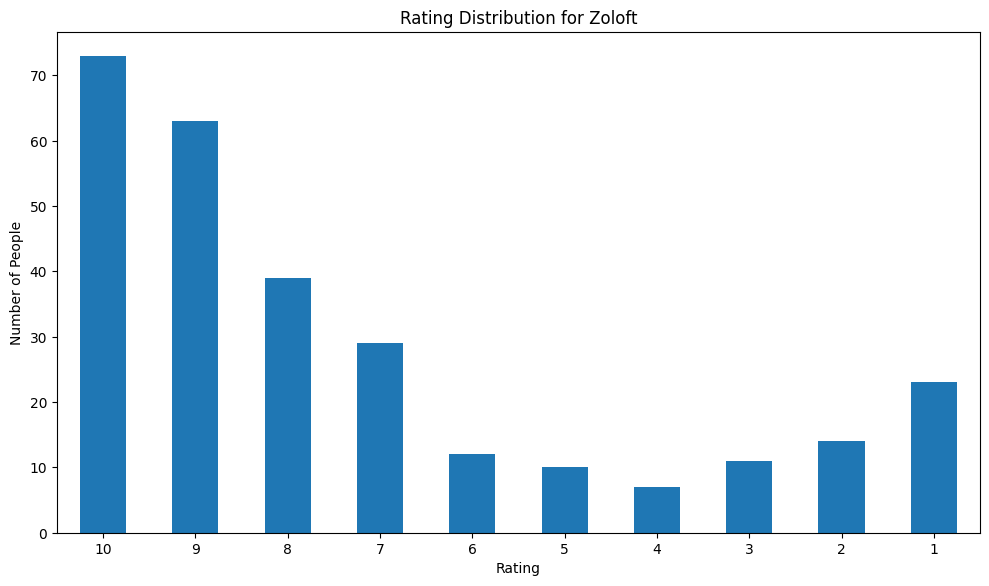

In [ ]:
# How many people gave ecah rating to a specific drug
specific_drug = "Zoloft"  # Change this to any drug name you want

# Filter the data for the specific drug
filtered = data1[data1['drugName'] == specific_drug]

# Count how many people gave each rating (10 to 1)
rating_counts = filtered['rating'].value_counts().sort_index(ascending = False)

# Plot
rating_counts.plot(kind='bar')
plt.title(f'Rating Distribution for {specific_drug}')
plt.xlabel('Rating')
plt.ylabel('Number of People')
plt.tight_layout()
plt.xticks(rotation = 0);
plt.show()

##### This code filters reviews for the drug “Zoloft” and visualizes how many users gave each rating from 10 to 1. It helps analyze public sentiment and satisfaction specifically for that drug.

In [ ]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

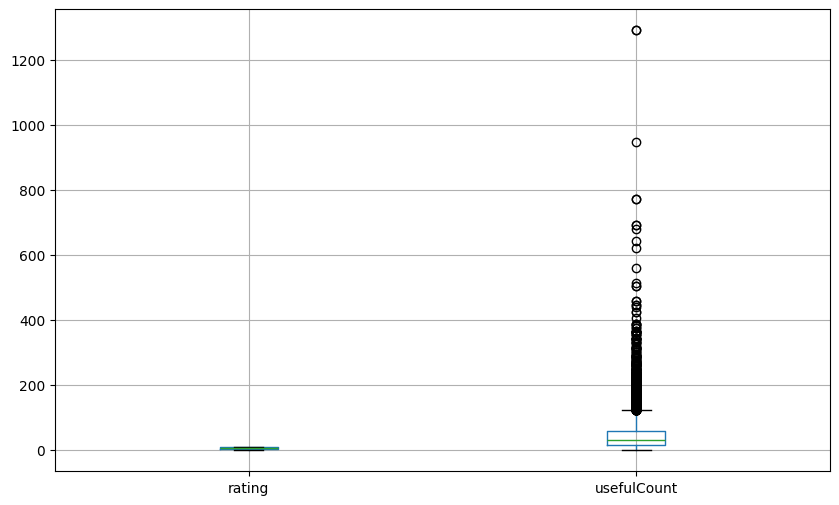

In [ ]:

data1.boxplot()
plt.show()

##### Creates a box plot for all numeric columns in the dataset to visualize spread and outliers.

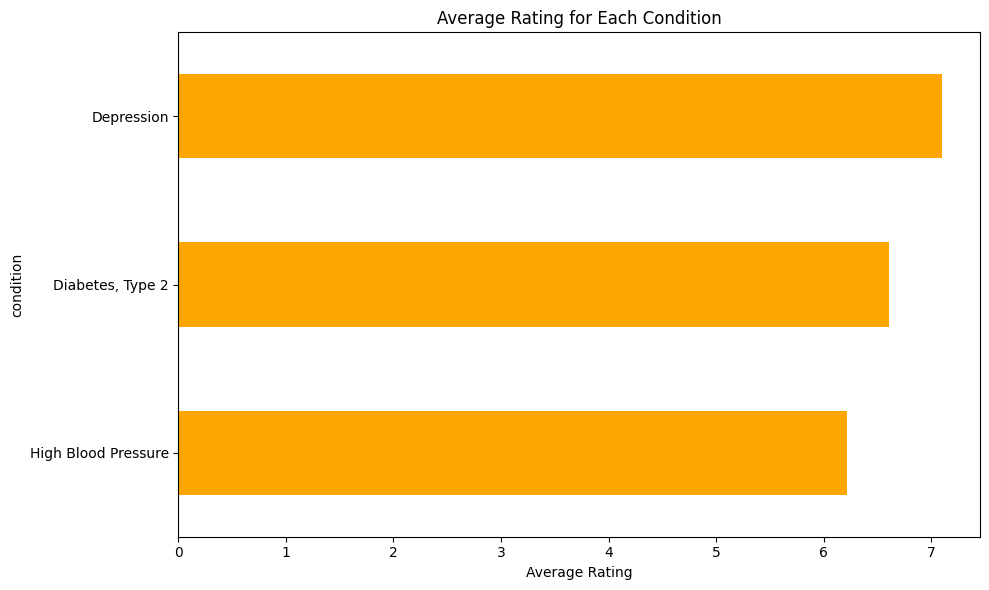

In [ ]:
avg_rating = data1.groupby('condition')['rating'].mean().sort_values()

avg_rating.plot(kind='barh', color='orange')
plt.title("Average Rating for Each Condition")
plt.xlabel("Average Rating")
plt.tight_layout()
plt.show()

##### Calculates the average rating for each condition in 'data1' and sorts them. Creates a horizontal bar chart showing average rating per condition.

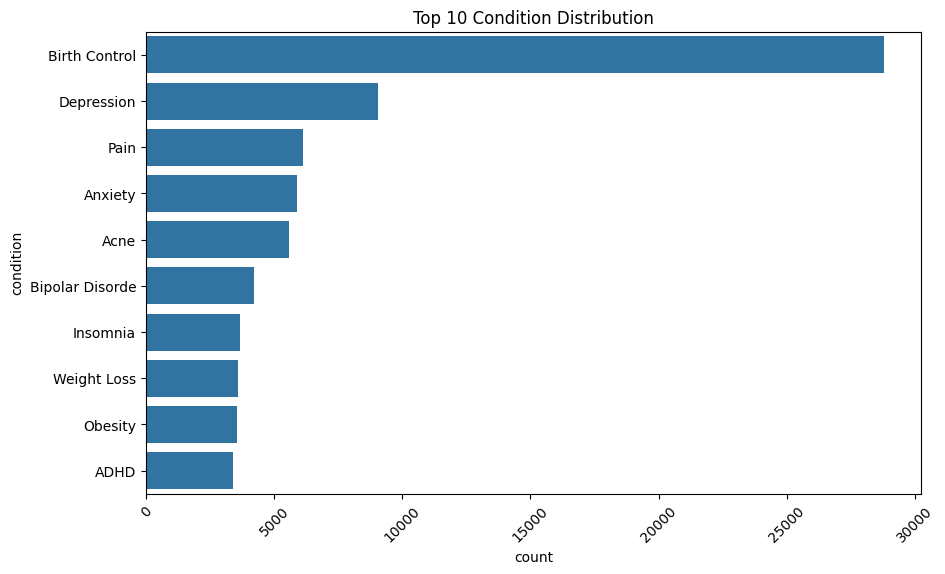

In [ ]:
top_conditions = data['condition'].value_counts().head(10).index
filtered_data = data[data['condition'].isin(top_conditions)]

plt.figure(figsize=(10, 6))
sns.countplot(filtered_data['condition'], order=filtered_data['condition'].value_counts().index)
plt.title('Top 10 Condition Distribution')
plt.xticks(rotation=45)
plt.show()

##### Extracts top 10 most common conditions based on their frequency in the dataset. Filters the dataset to only include those top 10 conditions. Creates a bar chart showing the number of reviews for each of the top 10 conditions.

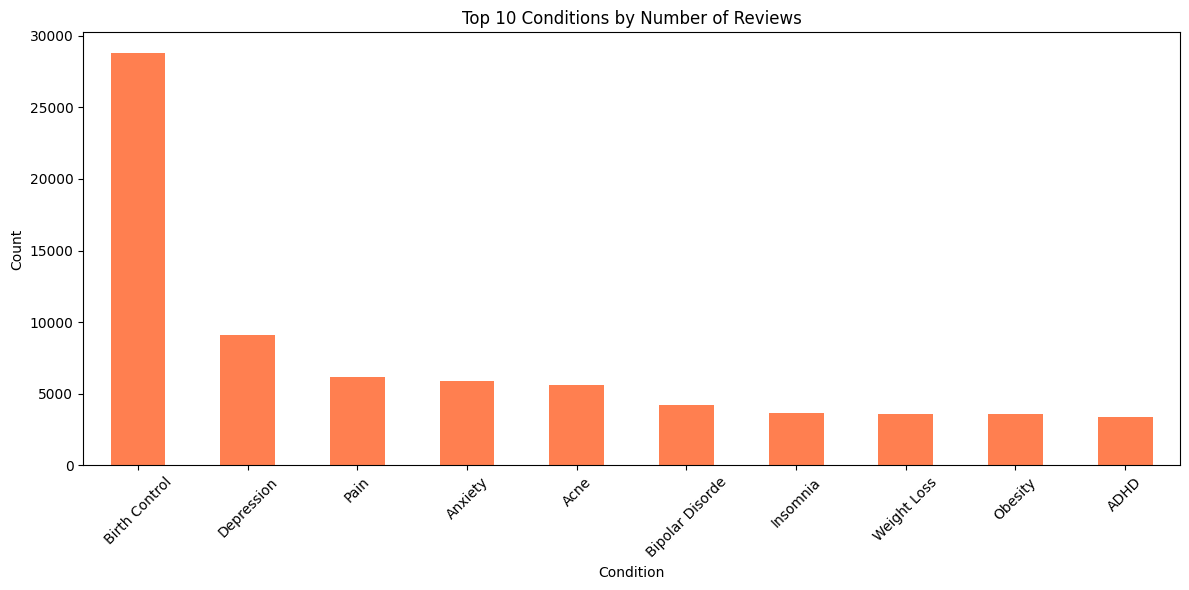

In [ ]:
plt.figure(figsize=(12,6))
data['condition'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title("Top 10 Conditions by Number of Reviews")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Plots a bar chart of the top 10 most reviewed conditions.

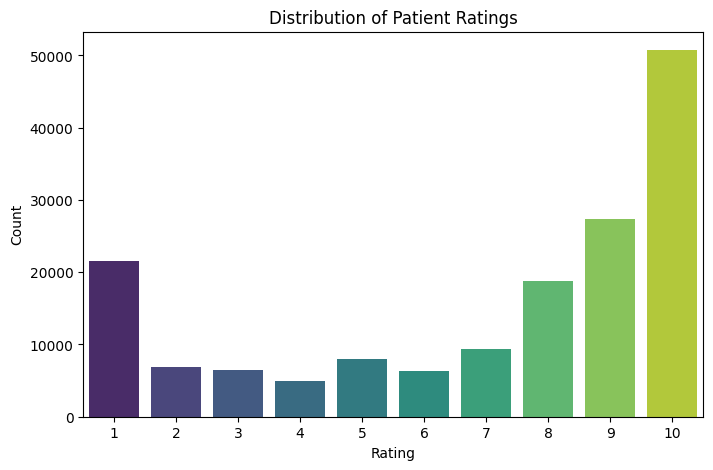

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=data, palette='viridis')
plt.title("Distribution of Patient Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

##### Creates a countplot showing how many times each rating (1 to 10) appears in the dataset.

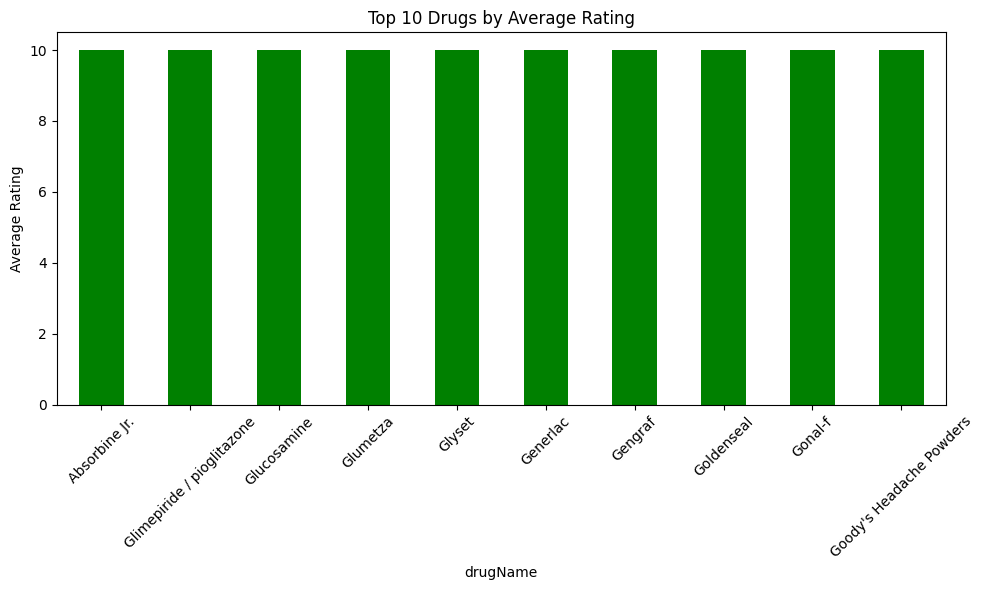

In [ ]:
top_drugs = data.groupby('drugName')['rating'].mean().sort_values(ascending=False).head(10)
top_drugs.plot(kind='bar', color='green')
plt.title("Top 10 Drugs by Average Rating")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Finds the top 10 drugs with the highest average rating.Plots those top drugs in a bar chart.

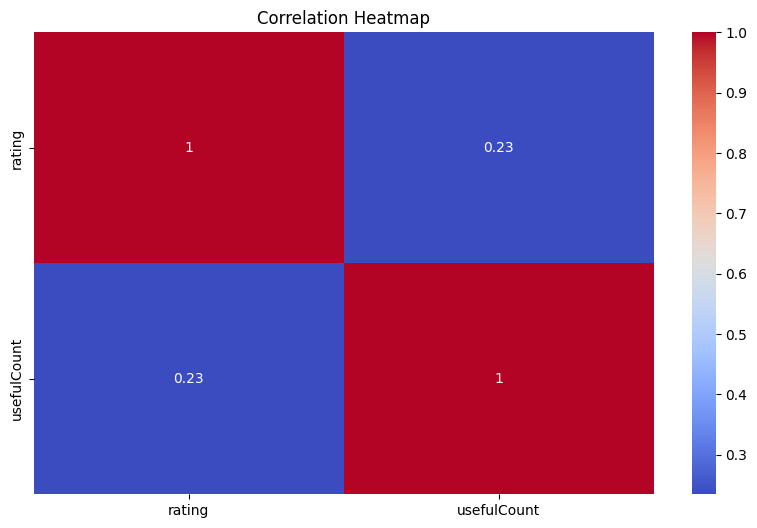

In [ ]:
sns.heatmap(data.select_dtypes(include=['int', 'float']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

##### Very less correlation between useful count and rating. This line selects only numeric columns (integer and float types) and calculates their correlation matrix.

## Sentiment Analysis

In [ ]:
# Function to assign sentiment based on rating
def get_sentiment(rating):
    if rating >= 7:
        return 'Positive'
    elif rating >= 4:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment function to the 'rating' column
data1['sentiment'] = data1['rating'].apply(get_sentiment)


# Show few rows
data1[['rating', 'sentiment']].head()

,rating,sentiment
11,10,Positive
30,8,Positive
43,4,Neutral
49,10,Positive
66,10,Positive


##### Define a function to assign sentiment based on rating: Positive (7-10), Neutral (4-6), Negative (1-3). Apply this function to the 'rating' column to create a new 'sentiment' column.
##### Display the first few rows showing ratings with their corresponding sentiment labels.


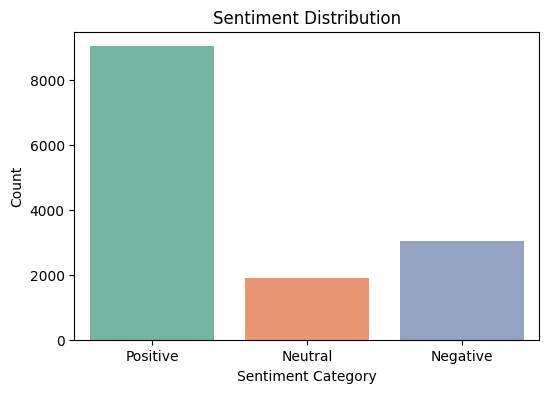

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=data1, palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()

##### Create a bar plot to visualize the number of reviews in each sentiment category. Set the figure size, title, and axis labels for better readability. Use a color palette to enhance the visual appearance

In [ ]:
data1

,drugName,condition,review,rating,usefulCount,sentiment
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,54,Positive
30,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,3,Positive
43,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,3,Neutral
49,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,24,Positive
66,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,166,Positive
...,...,...,...,...,...,...
160352,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4,39,Neutral
160359,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1,25,Negative
160379,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9,47,Positive
160387,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,33,Negative


### Feature Engineering

In [ ]:
from sklearn.preprocessing import StandardScaler
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

In [ ]:
data1['log_usefulCount'] = np.log1p(data1['usefulCount'])

##### This line creates a new column by applying log transformation to the 'usefulCount' values to reduce skewness and normalize the distribution for better model performance or visualization.

In [ ]:
data1

,drugName,condition,review,rating,usefulCount,sentiment,log_usefulCount
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,54,Positive,4.007333
30,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,3,Positive,1.386294
43,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,3,Neutral,1.386294
49,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,24,Positive,3.218876
66,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,166,Positive,5.117994
...,...,...,...,...,...,...,...
160352,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4,39,Neutral,3.688879
160359,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1,25,Negative,3.258097
160379,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9,47,Positive,3.871201
160387,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,33,Negative,3.526361


##### Display Data1 Dataset

In [ ]:
# Encode the target variable 'condition' to numerical labels
le = LabelEncoder()
y = le.fit_transform(data1['condition'])

##### This code encodes the categorical target variable 'condition' into numerical labels using LabelEncoder, making it suitable for machine learning models that require numeric input.

##### This dictionary stores four different machine learning models (MultinomialNB, Logistic Regression, Random Forest, and Decision Tree) to be used for training and comparison using TF-IDF features.

In [ ]:
# Combining drug name and reviews together to improve model performance
data1['combined_text'] = "drug: " + data1['drugName'] + " " + "review: " + data1['review']
data1 = data1.reset_index(drop=True)

##### This code combines the drug name and review text into a single feature called 'combined_text' to provide more context to the model, potentially improving its understanding and prediction performance.

## NLP (Text Cleaning )

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# NLP task
lemma = WordNetLemmatizer()
corpus = []
stop_words = set(stopwords.words('english')) # Set for faster computation
for i in range(len(data1)):
    msg = re.sub('[^a-zA-Z:]',' ',data1['combined_text'][i]) # Clean the text
    msg = msg.lower() # Text normalization
    msg = msg.split() # Word tokenize
    msg = [lemma.lemmatize(i) for i in msg if i not in stop_words] # Lemmatization
    msg = ' '.join(msg) # Join sentences
    corpus.append(msg)

##### This NLP preprocessing loop cleans and lemmatizes the combined drug and review text by removing special characters, converting to lowercase, removing stopwords, and applying lemmatization, resulting in a cleaned corpus ready for vectorization.

In [ ]:
corpus[0]

'drug: l methylfolate review: taken anti depressant year improvement mostly moderate severe side affect make go take cymbalta mostly pain began deplin noticed major improvement overnight energy better disposition sinking low low major depression taking month feel like normal person first time ever best thing side effect'

In [ ]:
text = " ".join(map(str, corpus))

##### corpus\[0] displays the first preprocessed review (with drug name), which has been cleaned, lowercased, stopwords removed, and lemmatized — useful for verifying that text preprocessing was applied correctly.


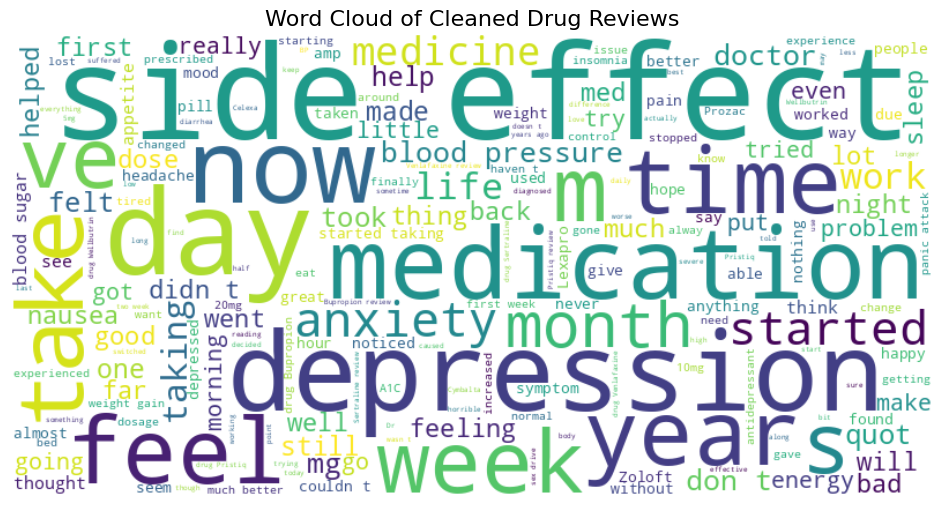

In [ ]:
from wordcloud import WordCloud

# Join all cleaned reviews into one big string
all_words = ' '.join(data1['combined_text'])

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Cleaned Drug Reviews", fontsize=16)
plt.show()

##### This code generates a word cloud from all combined drug names and reviews, visually highlighting the most frequently occurring words in the dataset, which can help identify common terms and themes in user feedback.


In [ ]:
data1['combined_text'].head(10)

,combined_text
0,"drug: L-methylfolate review: ""I have taken ant..."
1,"drug: Sertraline review: ""1 week on Zoloft for..."
2,"drug: Venlafaxine review: ""my gp started me on..."
3,"drug: Dulaglutide review: ""Hey Guys, It&#039;..."
4,"drug: Effexor XR review: ""This medicine saved ..."
5,"drug: Wellbutrin review: ""Started taking it an..."
6,"drug: Aripiprazole review: ""Intake Effexor XR ..."
7,"drug: Amlodipine / olmesartan review: ""My bloo..."
8,"drug: Desvenlafaxine review: ""This medication ..."
9,"drug: Dulaglutide review: ""I was recently refe..."


In [ ]:
data1[['review', 'combined_text']].head(10)

,review,combined_text
0,"""I have taken anti-depressants for years, with...","drug: L-methylfolate review: ""I have taken ant..."
1,"""1 week on Zoloft for anxiety and mood swings....","drug: Sertraline review: ""1 week on Zoloft for..."
2,"""my gp started me on Venlafaxine yesterday to ...","drug: Venlafaxine review: ""my gp started me on..."
3,"""Hey Guys, It&#039;s been 4 months since my l...","drug: Dulaglutide review: ""Hey Guys, It&#039;..."
4,"""This medicine saved my life. I was at my wits...","drug: Effexor XR review: ""This medicine saved ..."
5,"""Started taking it and I slept well at night a...","drug: Wellbutrin review: ""Started taking it an..."
6,"""Intake Effexor XR 375 mg, and lorazepam for d...","drug: Aripiprazole review: ""Intake Effexor XR ..."
7,"""My blood pressure has been around 160/100. Do...","drug: Amlodipine / olmesartan review: ""My bloo..."
8,"""This medication is amazing! After 3 days of b...","drug: Desvenlafaxine review: ""This medication ..."
9,"""I was recently referred to a endocrinologist ...","drug: Dulaglutide review: ""I was recently refe..."


##### This code displays the first 10 rows of the dataset, showing both the original reviews and their corresponding combined\_text (which includes the drug name + review). It helps verify whether text merging for NLP was done correctly.


In [ ]:
data1['original_length'] = data1['review'].apply(len)
data1['cleaned_length'] = data1['combined_text'].apply(len)

data1[['original_length', 'cleaned_length']].head()

,original_length,cleaned_length
0,456,485
1,271,296
2,711,737
3,767,793
4,568,593


##### This code calculates and stores the character length of each original review and its combined (drug + review) text, allowing comparison of text size before and after preprocessing, which is useful for feature analysis and visualization.


In [ ]:
# Print few original and cleaned reviews
for i in range(3):
    print(f"\n - Original Review {i+1}:\n", data1['review'].iloc[i])
    print(f"\n - Cleaned Review {i+1}:\n", data1['combined_text'].iloc[i])


 - Original Review 1:
 "I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.

I only take Cymbalta now mostly for pain.

When I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."

 - Cleaned Review 1:
 drug: L-methylfolate review: "I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.

I only take Cymbalta now mostly for pain.

When I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."

 - Origin

##### This loop prints the first three original reviews alongside their cleaned and combined versions, helping you visually confirm that the preprocessing and text merging steps were applied correctly.


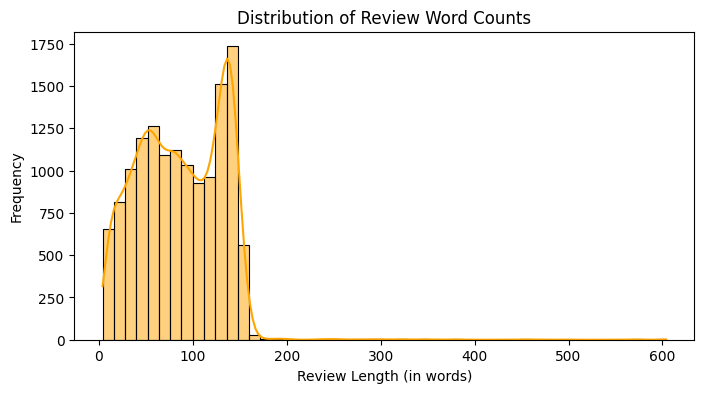

In [ ]:
# Distribution of Review Lengths
data1['review_length'] = data1['combined_text'].apply(lambda x: len(x.split()))

# Plot the distribution
plt.figure(figsize=(8, 4))
sns.histplot(data1['review_length'], bins=50, kde=True, color='orange')
plt.title('Distribution of Review Word Counts')
plt.xlabel('Review Length (in words)')
plt.ylabel('Frequency')
plt.show()

##### This code calculates the number of words in each combined review and visualizes the distribution, helping to understand the typical length of reviews and identify unusually short or long ones that might affect model training.


In [ ]:
from collections import Counter

# Optional: filter only valid ratings
data1 = data1[data1['rating'].isin(range(1, 11))]

# Empty dict to store top words
rating_word_counts = {}

for rating in range(1, 11):
    # Filter reviews with this rating
    reviews = data1[data1['rating'] == rating]['combined_text']

    # Join all reviews into one string
    all_words = " ".join(reviews)

    # Count word frequency
    word_count = Counter(all_words.split())

    # Get top 10 common words for this rating
    rating_word_counts[rating] = word_count.most_common(10)

##### This code analyzes the top 10 most frequent words used in reviews for each rating (1 to 10) by counting word occurrences, helping to understand how language patterns differ based on user satisfaction levels.


In [ ]:
for rating in rating_word_counts:
    print(f"\nTop Words for Rating {rating}:")
    for word, count in rating_word_counts[rating]:
        print(f"{word}: {count}")


Top Words for Rating 1:
I: 6437
and: 4251
to: 3525
the: 3247
my: 2557
a: 2320
was: 2198
of: 1858
it: 1839
for: 1813

Top Words for Rating 2:
I: 2411
and: 1674
to: 1376
the: 1311
my: 947
a: 875
for: 804
was: 779
of: 765
drug:: 645

Top Words for Rating 3:
I: 2172
and: 1437
to: 1292
the: 1238
a: 889
my: 804
for: 687
it: 639
was: 633
of: 625

Top Words for Rating 4:
I: 1714
and: 1164
to: 1029
the: 905
a: 718
my: 708
was: 513
for: 505
it: 495
of: 478

Top Words for Rating 5:
I: 2912
and: 1806
to: 1625
the: 1512
a: 1124
my: 1094
for: 888
it: 874
have: 760
drug:: 756

Top Words for Rating 6:
I: 2569
and: 1735
to: 1445
the: 1402
a: 1136
my: 942
for: 830
of: 729
it: 718
drug:: 680

Top Words for Rating 7:
I: 4178
and: 2800
to: 2189
the: 2111
a: 1840
my: 1517
for: 1259
have: 1186
of: 1141
it: 1122

Top Words for Rating 8:
I: 7578
and: 4920
to: 3987
the: 3858
a: 3298
my: 2703
for: 2372
have: 2144
of: 2036
it: 1873

Top Words for Rating 9:
I: 10839
and: 6987
to: 5217
the: 4917
a: 4511
my: 3593
f

##### This loop prints the top 10 most common words for each drug rating (1 to 10), allowing you to observe how user vocabulary changes based on satisfaction level—useful for insights and sentiment pattern analysis.


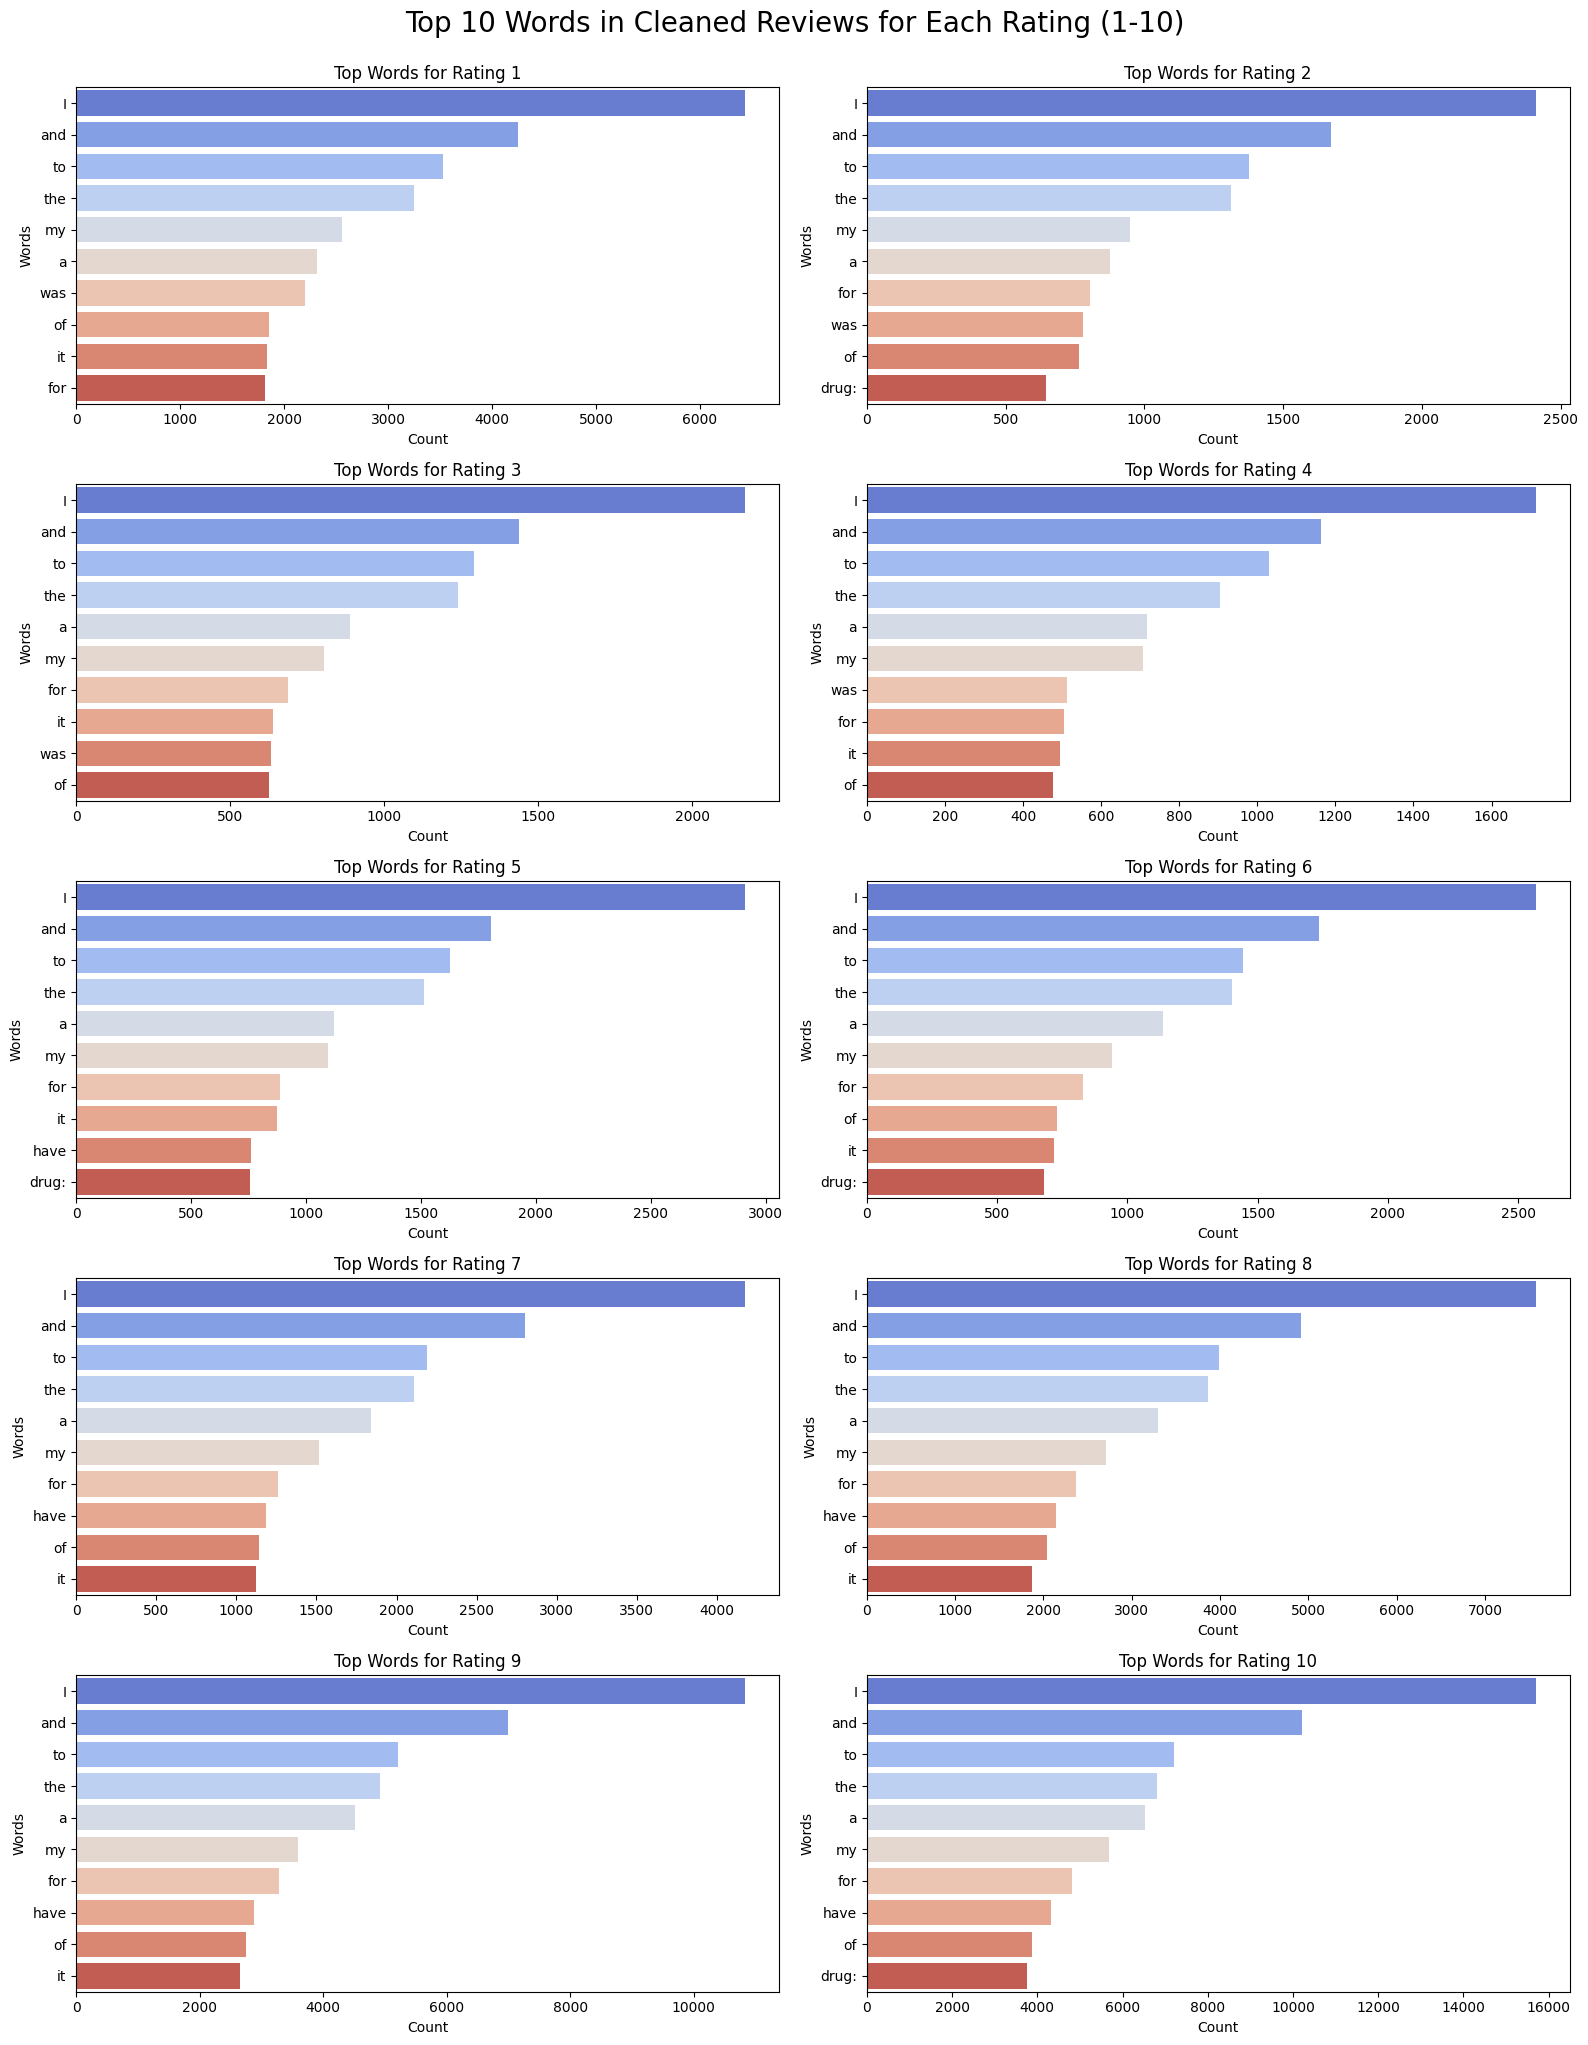

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 20))
axes = axes.flatten()

# Loop through each rating (1 to 10)
for idx, rating in enumerate(range(1, 11)):
    if rating in rating_word_counts:
        words, counts = zip(*rating_word_counts[rating])
        sns.barplot(x=list(counts), y=list(words), ax=axes[idx], palette='coolwarm')
        axes[idx].set_title(f'Top Words for Rating {rating}')
        axes[idx].set_xlabel('Count')
        axes[idx].set_ylabel('Words')

# Adjust layout
plt.tight_layout()
plt.suptitle("Top 10 Words in Cleaned Reviews for Each Rating (1-10)", fontsize=20, y=1.02)
plt.show()

##### This code creates a grid of bar plots, each showing the top 10 most frequent words for reviews with a specific rating from 1 to 10. It visually highlights how word usage changes across different satisfaction levels, offering valuable insights for sentiment analysis.


## TF-IDF Vectorizer

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

In [ ]:
vectorizer = TfidfVectorizer(max_features = 1000) # for slower models like random forest and lightbgm
x = vectorizer.fit_transform(corpus)

##### This code converts the cleaned text corpus into numerical feature vectors using TF-IDF with a maximum of 1000 features, which helps reduce dimensionality and improves efficiency when training slower models like Random Forest or LightGBM.


In [ ]:
vectorizer1 = TfidfVectorizer(max_features = 5000)  # for faster models like logistic regression
x1 = vectorizer1.fit_transform(corpus)

##### This code creates a TF-IDF feature matrix with up to 5000 features from the cleaned corpus, optimized for faster models like Logistic Regression to capture more text information while maintaining performance efficiency.


In [ ]:
# stratify = y ensures minority class exists in both train and test sets (1000 features)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

##### This code splits the TF-IDF feature matrix (with 1000 features) and target labels into training and testing sets while preserving the class distribution using stratify=y, ensuring that both sets have a balanced representation of all conditions.


In [ ]:
# stratify = y ensures minority class exists in both train and test sets (5000 features)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y, test_size=0.2, random_state=42, stratify=y)

##### This code splits the TF-IDF feature matrix with 5000 features into training and testing sets while preserving the class distribution using stratify=y, ensuring fair evaluation and representation of all condition classes in both sets.


In [ ]:
# small subset of data for hyperparameter tuning for 1000 features
x_sample, y_sample = resample(x_train, y_train, n_samples=5000, random_state=42, replace=False)

##### This code selects a random subset of 5,000 samples from the training data (with 1000 TF-IDF features) without replacement, which is useful for faster hyperparameter tuning while maintaining representative data.


In [ ]:
# small subset of data for hyperparameter tuning for 5000 features
x_sample1, y_sample1 = resample(x_train1, y_train1, n_samples=5000, random_state=42, replace=False)

##### This code randomly selects 5,000 samples from the training data with 5000 TF-IDF features (without replacement), allowing quicker hyperparameter tuning on a smaller yet diverse subset of the full dataset.


### Model Building And Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
models = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state = 42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20]
        }
    },
      "LightGBM": {
        "model": LGBMClassifier(force_col_wise=True, verbosity=-1, random_state = 42),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1]
        }
      },
     "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [5, 10, 20, None],
            "min_samples_split": [2, 5, 10],
            "criterion": ['gini', 'entropy']
        }
    }
}

##### This dictionary defines three models—Random Forest, LightGBM, and Decision Tree—along with their respective hyperparameter grids, which will be used for tuning and model selection to improve classification performance.


In [ ]:
# Hyperparamter tuning
for name, config in models.items():
    print(f"Tuning {name}...")
    random = RandomizedSearchCV(config["model"], config["params"], cv=3, scoring='accuracy',
                                verbose=0,  n_iter=10)
    random.fit(x_sample, y_sample)

    print(f"Best Score for {name}: {random.best_score_:.4f}")
    print(f"Best Params for {name}: {random.best_params_}\n")

Tuning Random Forest...
Best Score for Random Forest: 0.9604
Best Params for Random Forest: {'n_estimators': 100, 'max_depth': None}

Tuning LightGBM...
Best Score for LightGBM: 0.9716
Best Params for LightGBM: {'n_estimators': 200, 'learning_rate': 0.1}

Tuning Decision Tree...
Best Score for Decision Tree: 0.9362
Best Params for Decision Tree: {'min_samples_split': 5, 'max_depth': None, 'criterion': 'gini'}



##### This loop performs hyperparameter tuning using RandomizedSearchCV for each model in the models dictionary, evaluating different parameter combinations on the 1000-feature subset and printing the best accuracy score and parameters for each model.


In [ ]:
 models1 = {
     "MultinomialNB": {
        "model": MultinomialNB(),
        "params": {
            "alpha": [0.1, 0.2, 0.5]
        }
    },
    "Logistic_Regression": {
        "model": LogisticRegression(random_state = 42),
        "params": {
            'C': [0.1, 0.4, 6, 9, 10],
            'penalty': ['l2'],
            'solver': ['lbfgs', 'saga'],
            'multi_class': ['multinomial'],
            'max_iter': [500, 1000]
        }
    },
     "ComplementNB": {
         "model": ComplementNB(),
         "params": {
             'alpha': [0.1, 0.2 ,0.5],
             'norm': [True, False]
       }
    },
     "LinearSVC": {
         "model": LinearSVC(random_state = 42),
         "params" : {
             'C' : [0.1, 0.5, 1, 10]
        }
     }
 }

##### This dictionary models1 defines four fast classification models—MultinomialNB, Logistic Regression, ComplementNB, and LinearSVC—each with its respective hyperparameter search space, to be used in hyperparameter tuning for optimizing performance using TF-IDF features (typically with 5000 features).


In [ ]:
# Hyperparamter tuning for 5000 features
for name, config in models1.items():
    print(f"Tuning {name}...")
    random = RandomizedSearchCV(config["model"], config["params"], cv=3, scoring='accuracy',
                                verbose=0,  n_iter=10)
    random.fit(x_sample1, y_sample1)

    print(f"Best Score for {name}: {random.best_score_:.4f}")
    print(f"Best Params for {name}: {random.best_params_}\n")

Tuning MultinomialNB...
Best Score for MultinomialNB: 0.9818
Best Params for MultinomialNB: {'alpha': 0.1}

Tuning Logistic_Regression...
Best Score for Logistic_Regression: 0.9822
Best Params for Logistic_Regression: {'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'max_iter': 500, 'C': 10}

Tuning ComplementNB...
Best Score for ComplementNB: 0.9898
Best Params for ComplementNB: {'norm': True, 'alpha': 0.1}

Tuning LinearSVC...
Best Score for LinearSVC: 0.9890
Best Params for LinearSVC: {'C': 10}



##### This loop performs hyperparameter tuning using RandomizedSearchCV on the faster models (MultinomialNB, Logistic Regression, ComplementNB, and LinearSVC) using the 5000-feature TF-IDF subset, and prints the best accuracy score and parameter set for each model.


In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators = 100, max_depth = None, random_state = 42),
    "Decision_Tree": DecisionTreeClassifier(min_samples_split = 5, max_depth = None,
                                            criterion = 'entropy'),
    "LightGBM": LGBMClassifier(force_col_wise = True, verbosity = -1,
                               n_estimators = 100, learning_rate = 0.1, random_state = 42)
}

for name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    model.fit(x_train, y_train)
    train_acc = model.score(x_train, y_train)
    preds = model.predict(x_test)
    test_acc = accuracy_score(y_test, preds)

    print(f"\n{name}")
    print(f"  → CV Accuracy   : {scores.mean():.4f}")
    print(f"  → Train Accuracy: {train_acc:.4f}")
    print(f"  → Test Accuracy : {test_acc:.4f}")


Random Forest
  → CV Accuracy   : 0.9752
  → Train Accuracy: 0.9998
  → Test Accuracy : 0.9745

Decision_Tree
  → CV Accuracy   : 0.9579
  → Train Accuracy: 0.9962
  → Test Accuracy : 0.9552

LightGBM
  → CV Accuracy   : 0.9842
  → Train Accuracy: 0.9998
  → Test Accuracy : 0.9821


##### This code trains the tuned slower models (Random Forest, Decision Tree, and LightGBM) on the 1000-feature TF-IDF dataset, evaluates them using 5-fold cross-validation, and prints their training and testing accuracies to assess overfitting and generalization performance.


In [ ]:
# for 5000 features
models1 = {
           "MultinomialNB": MultinomialNB(alpha = 0.1),
           "Logistic_Regression": LogisticRegression(solver = 'lbfgs', penalty = 'l2',
                                                    multi_class = 'multinomial', max_iter = 500, C = 10),
           "ComplementNB": ComplementNB(alpha = 0.1, norm = True),
           "LinearSVC" : LinearSVC(C = 10)
         }

for name, model in models1.items():
    scores = cross_val_score(model, x_train1, y_train1, cv=5, scoring='accuracy')
    model.fit(x_train1, y_train1)
    train_acc = model.score(x_train1, y_train1)
    preds = model.predict(x_test1)
    test_acc = accuracy_score(y_test1, preds)

    print(f"\n{name}")
    print(f"  → CV Accuracy   : {scores.mean():.4f}")
    print(f"  → Train Accuracy: {train_acc:.4f}")
    print(f"  → Test Accuracy : {test_acc:.4f}")


MultinomialNB
  → CV Accuracy   : 0.9881
  → Train Accuracy: 0.9955
  → Test Accuracy : 0.9900

Logistic_Regression
  → CV Accuracy   : 0.9931
  → Train Accuracy: 0.9999
  → Test Accuracy : 0.9914

ComplementNB
  → CV Accuracy   : 0.9892
  → Train Accuracy: 0.9923
  → Test Accuracy : 0.9864

LinearSVC
  → CV Accuracy   : 0.9961
  → Train Accuracy: 1.0000
  → Test Accuracy : 0.9964


##### LinearSVC is performing better with no overfitting and excellent generalization.This code evaluates the performance of optimized faster models (MultinomialNB, Logistic Regression, ComplementNB, and LinearSVC) on the 5000-feature TF-IDF data using 5-fold cross-validation, and prints their training and test accuracies to compare model performance and generalization ability.


In [ ]:
lsvc = LinearSVC(C = 10)
lsvc.fit(x_train1, y_train1)

LinearSVC(C=10)

##### This code initializes a Linear Support Vector Classifier (LinearSVC) with a regularization parameter C=10 and trains it on the 5000-feature TF-IDF training data (x\_train1, y\_train1), preparing the model for prediction and evaluation.


In [ ]:
print(f'Training Accuracy: {lsvc.score(x_train1, y_train1)}')
print(f'Testing Accuracy: {lsvc.score(x_test1, y_test1)}')
y_pred = lsvc.predict(x_test1)
print(f'Classification Report:\n {classification_report(y_test1, y_pred)}')

Training Accuracy: 1.0
Testing Accuracy: 0.9964144854786662
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1814
           1       1.00      0.99      1.00       511
           2       0.99      0.99      0.99       464

    accuracy                           1.00      2789
   macro avg       1.00      0.99      1.00      2789
weighted avg       1.00      1.00      1.00      2789



##### The gap between training and testing accuracy is 0.3%, indicating excellent generalization with minimal overfitting.
##### This code evaluates the trained LinearSVC model by printing:

##### * Training Accuracy: How well the model fits the training data
##### * Testing Accuracy: How well the model generalizes to unseen data
##### * Classification Report: Precision, recall, and F1-score for each class (condition)

##### This helps assess both overall performance and how well each condition is being predicted.


In [ ]:
# checking the model
sentence = "I have been taking Jardiance for just over a year - I have NOT experienced any side effects whatsoever - MORE importantly this drug has reduced my blood sugar levels to an average of 5 and has maintained this level, quite incredible as nothing else has worked previously - I have named Jardiance as the &quot;diabetic wonder drug&quot; although my Doctor keeps reminding me there is no such thing as a wonder drug - I disagree this is MY wonder drug - thank you Jardiance you have changed my life completely astonishing result."
X_new = vectorizer1.transform([sentence])
predicted_class = lsvc.predict(X_new)[0]
if X_new.nnz == 0:  # nnz = number of non-zero features
    print("Input sentence contains no known words. Cannot classify.")
else:
    #getting the class name not class number
    predicted_disease = le.inverse_transform([predicted_class])[0]
    print(predicted_disease)

Diabetes, Type 2


### Pipeline And Deployment


In [ ]:
from sklearn.pipeline import Pipeline
x_pipe = data1['combined_text']
y_pipe = le.fit_transform(data1['condition'])

# NLP task
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

def clean_text(text):
    text = re.sub('[^a-zA-Z:]', ' ', text)        # Remove special characters
    text = text.lower()                          # Lowercase
    words = text.split()                         # Tokenize
    words = [lemma.lemmatize(w) for w in words if w not in stop_words]  # Remove stopwords + lemmatize
    return ' '.join(words)

x_train_pipe, x_test_pipe, y_train_pipe, y_test_pipe = train_test_split(x_pipe, y_pipe, test_size =  0.2,
                                                                    stratify = y_pipe, random_state = 42)

disease_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(preprocessor = clean_text, max_features = 5000)),
    ('clf', LinearSVC(C = 10))
])
disease_pipeline.fit(x_train_pipe, y_train_pipe)
print(f'Training Accuracy: {disease_pipeline.score(x_train_pipe, y_train_pipe)}')
print(f'Testing Accuracy: {disease_pipeline.score(x_test_pipe, y_test_pipe)}')


Training Accuracy: 1.0
Testing Accuracy: 0.9960559340265328


In [ ]:
import pickle
model_path = 'disease_model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(disease_pipeline, file)

In [ ]:
print(le.classes_)

['Depression' 'Diabetes, Type 2' 'High Blood Pressure']


In [ ]:
pd.DataFrame([text], columns=["full_text"]).to_csv("wordcloud.csv", index=False)

In [ ]:
from google.colab import files
files.download('/content/wordcloud.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Deployment  cloud link


https://data-science-projects-rhzjyyjum2ymdf4p9vjnyu.streamlit.app/